# Credit Card Default Prediction Project

## Introduction
In this project, we aim to predict default payments of credit card clients in Taiwan based on their demographic factors, credit data, and payment history. By analyzing the provided dataset and applying machine learning techniques, we can build a predictive model that can help identify clients who are more likely to default on their credit card payments.

## Dataset Information
The dataset contains information on credit card clients in Taiwan from April 2005 to September 2005. It consists of 25 variables:

- **ID**: ID of each client
- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- **SEX**: Gender (1=male, 2=female)
- **EDUCATION**: Education level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
- **AGE**: Age in years
- **PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6**: Repayment status in different months (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- **BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6**: Amount of bill statement in different months (NT dollar)
- **PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6**: Amount of previous payment in different months (NT dollar)
- **default.payment.next.month**: Default payment (1=yes, 0=no)



## Project Steps
1. Data Exploration: Explore the dataset to understand its structure, distributions, and relationships between variables.
2. Data Preprocessing: Handle missing values, outliers, and perform necessary data cleaning and transformation.
3. Feature Engineering: Create new features or transform existing ones to capture valuable information.
4. Model Selection: Choose suitable machine learning models for the prediction task.
5. Model Training: Train the selected models on the preprocessed data.
6. Model Evaluation: Evaluate the performance of the trained models using appropriate evaluation metrics.
7. Prediction: Make predictions on new data to identify potential defaulters.

## Required Libraries
The following Python libraries will be used in this project:
- Pandas: Data manipulation and analysis.
- NumPy: Mathematical operations and array manipulation.
- Matplotlib: Data visualization.
- Seaborn: Enhanced data visualization.
- scikit-learn: Machine learning models and evaluation.

## Approach
Our approach involves analyzing the dataset, performing necessary data preprocessing, engineering relevant features, and training predictive models


## Importing required files

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

#### Download and import csv as Dataframe

In [2]:
df = pd.read_csv(r"C:\Users\amirt\OneDrive\Documents\Projects\ML-projects\Notebooks\UCI_Credit_Card.csv")

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#### Summary of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

#### Checking the null values

In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

We can see that there are no null values and our data is clean

ID is not needed, so lets remove it

#### Dropping the unneed column

In [6]:
df = df.drop(["ID"],axis = 1)
df.rename(columns={'default.payment.next.month': 'def_pay'}, inplace=True)

In [7]:
df.shape

(30000, 24)

In [8]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### Checking categorical and numerical features

In [9]:
df.nunique()

LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
def_pay          2
dtype: int64

Though all the dtypes are integer, there may be categorical features that is encoded. From nunique values, we can see that sex,Education, Marriage and default payment next month are categorical values

In [10]:
cat_list = [feature for feature in df.columns if len(df[feature].unique()) <12]
num_list = [feature for feature in df.columns if feature not in cat_list]
print("There are",len(cat_list)," categorical features of df are ", cat_list)
print("There are",len(num_list),"numerical features of df are ", num_list)

There are 10  categorical features of df are  ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'def_pay']
There are 14 numerical features of df are  ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


### Changing the dtypes

In [11]:
# Convert the selected categorical columns to object type
df[cat_list] = df[cat_list].astype('object')

### Univariate analysis

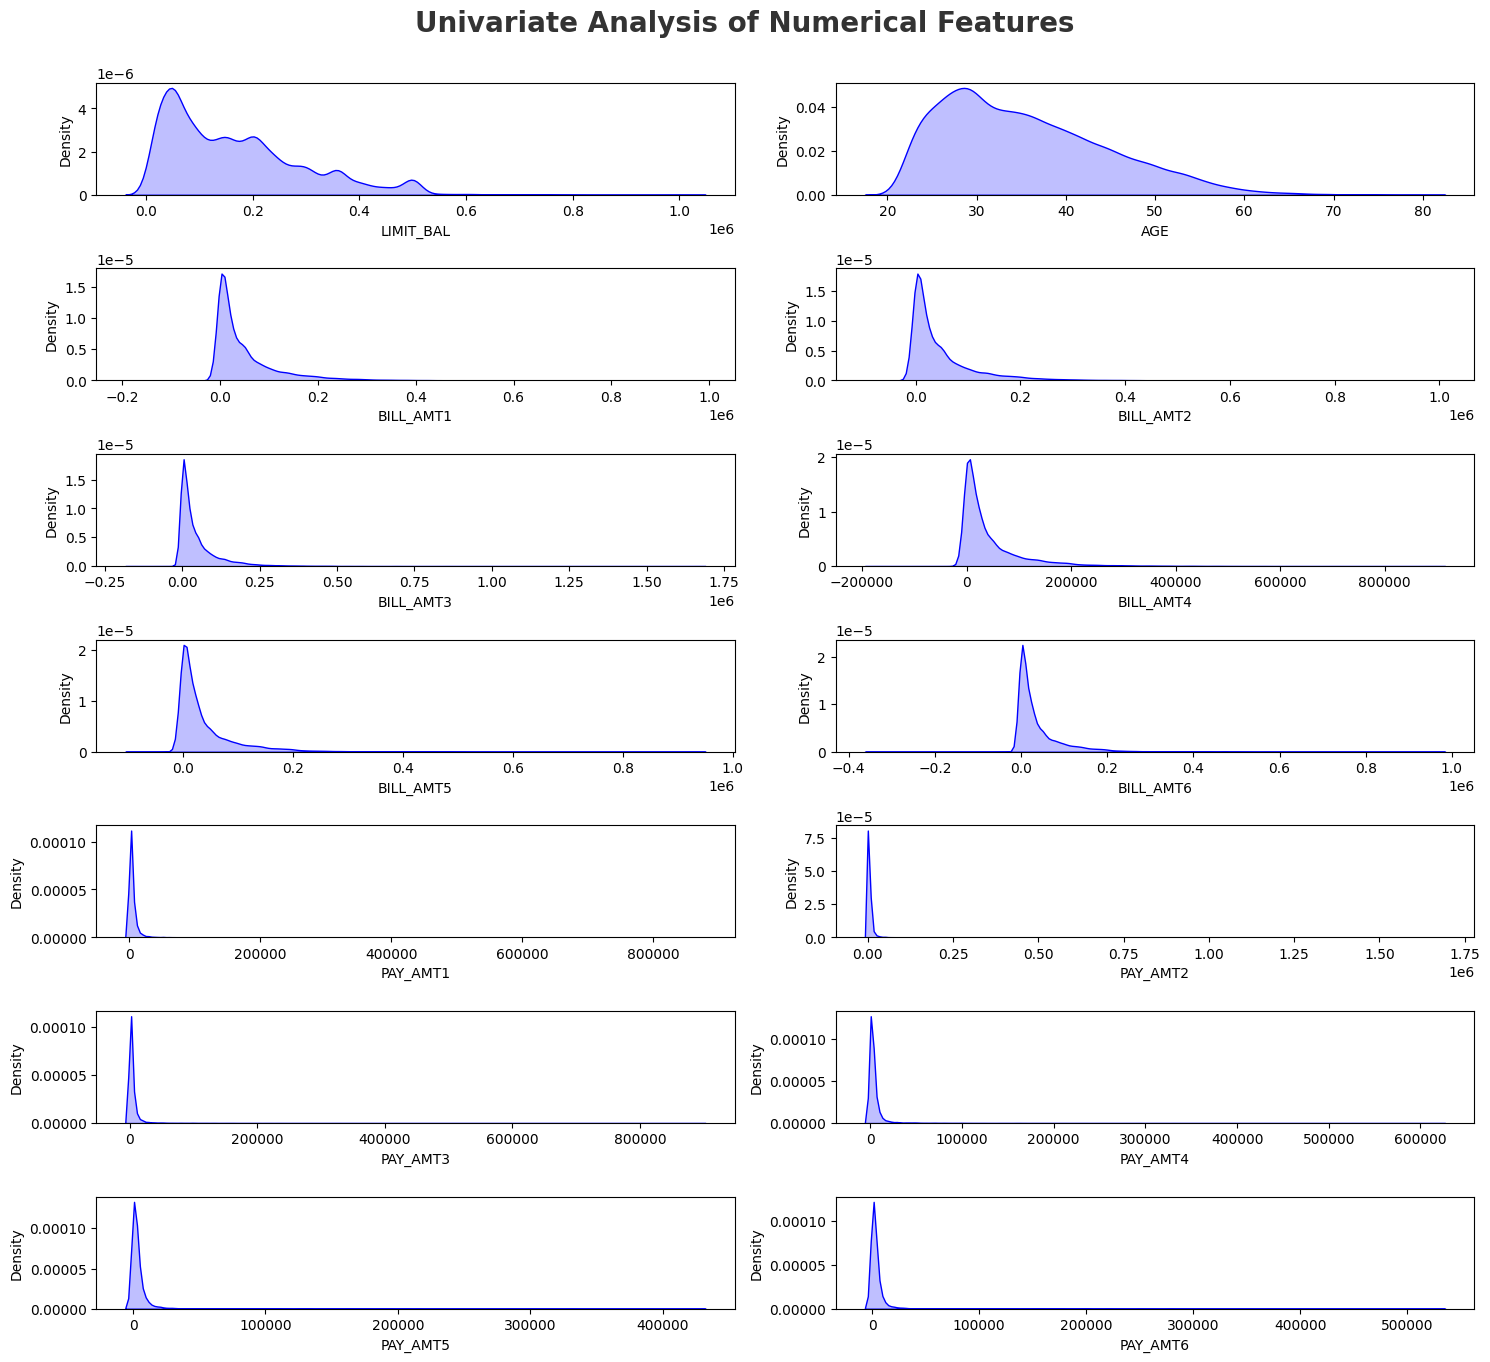

In [12]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_list)):
    plt.subplot(8, 2, i+1)
    sns.kdeplot(x=df[num_list[i]],shade=True, color='b')
    plt.xlabel(num_list[i])
    plt.tight_layout()

### Multivartiate analysis

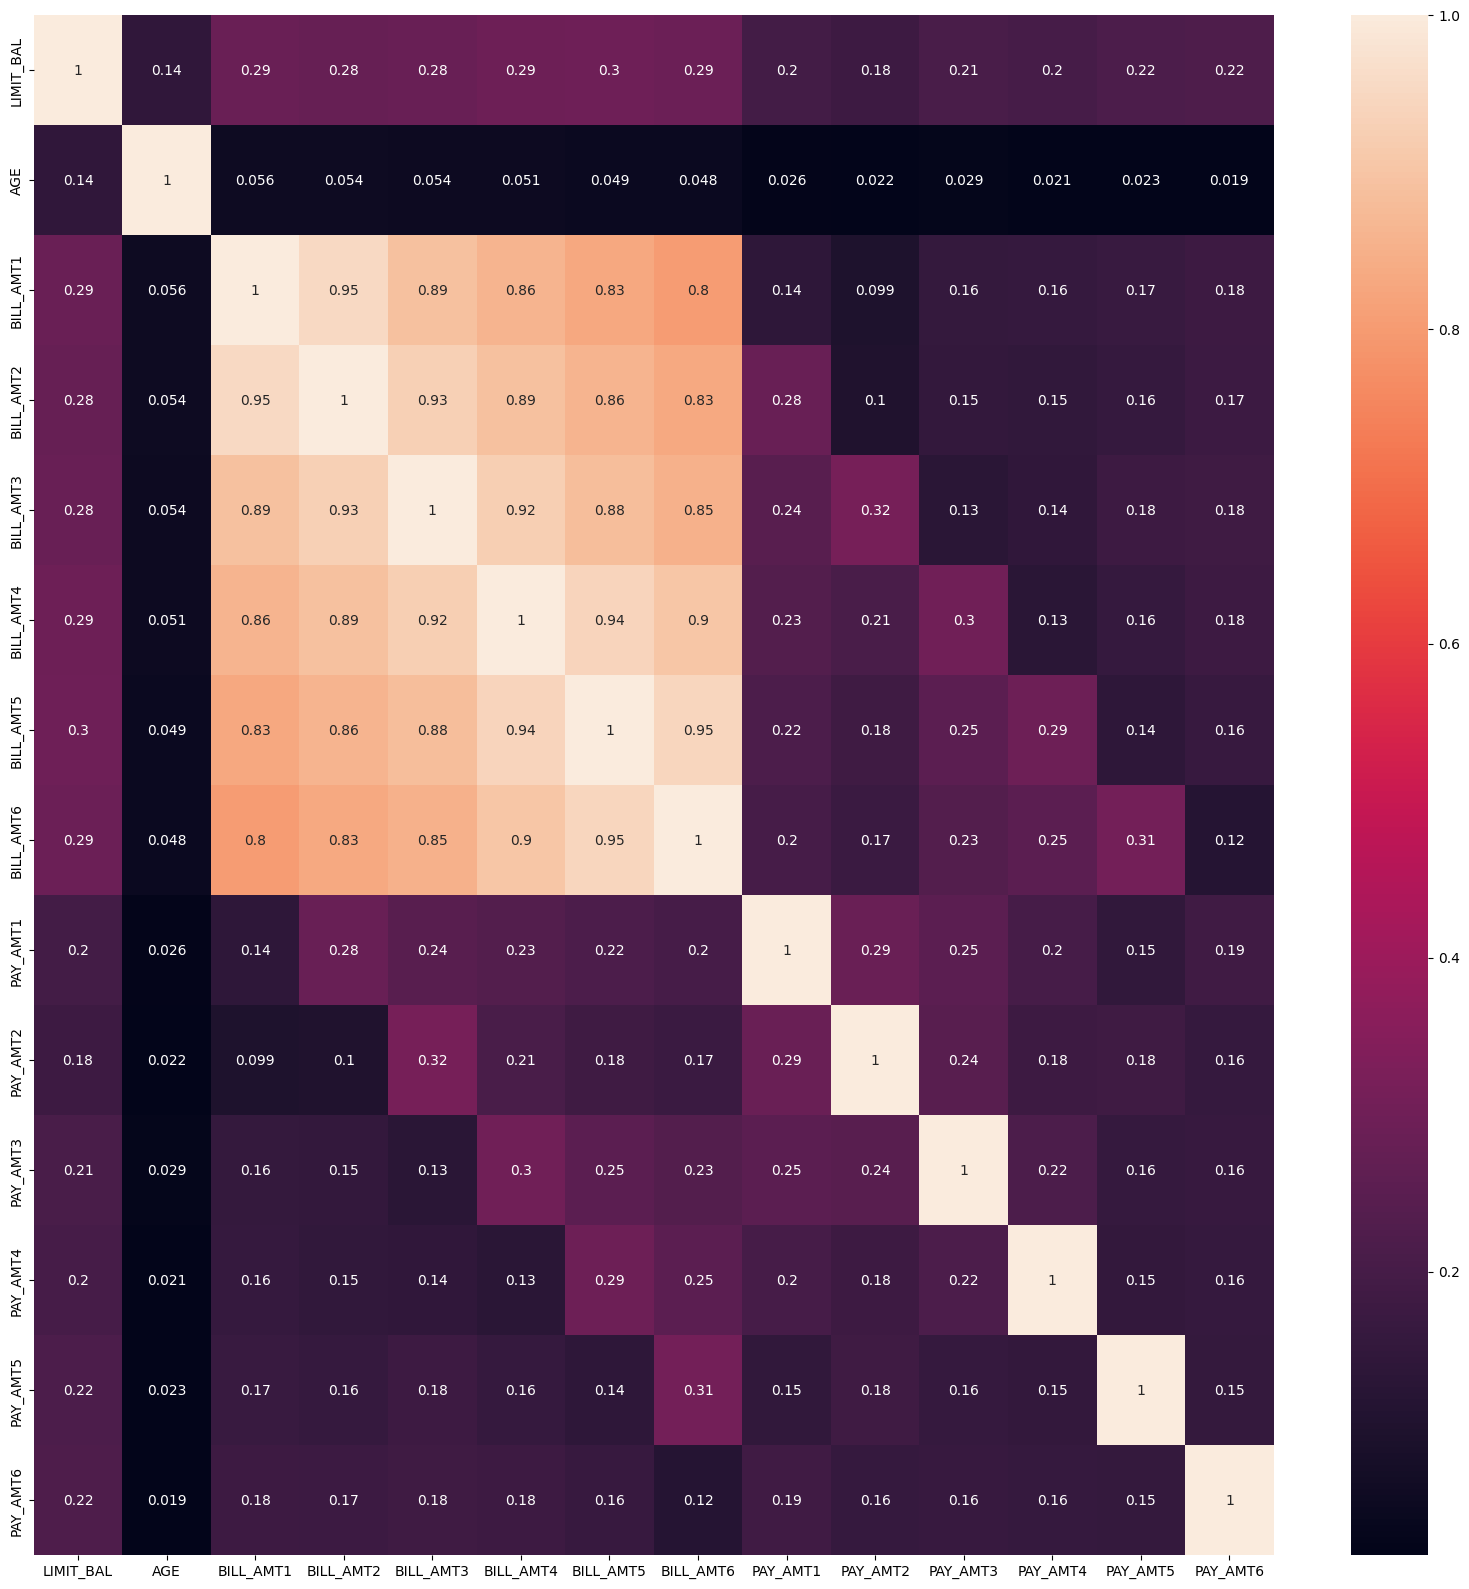

In [13]:
plt.figure(figsize = (20,20))
sns.heatmap(df[num_list].corr(), annot=True)
plt.show()

Bill payment amount are postively correlated.This implies that as the bill amount in one month increases, the bill amounts in other months also tend to increase. It suggests a consistent or increasing credit card usage or spending pattern over time.

### Categorical features

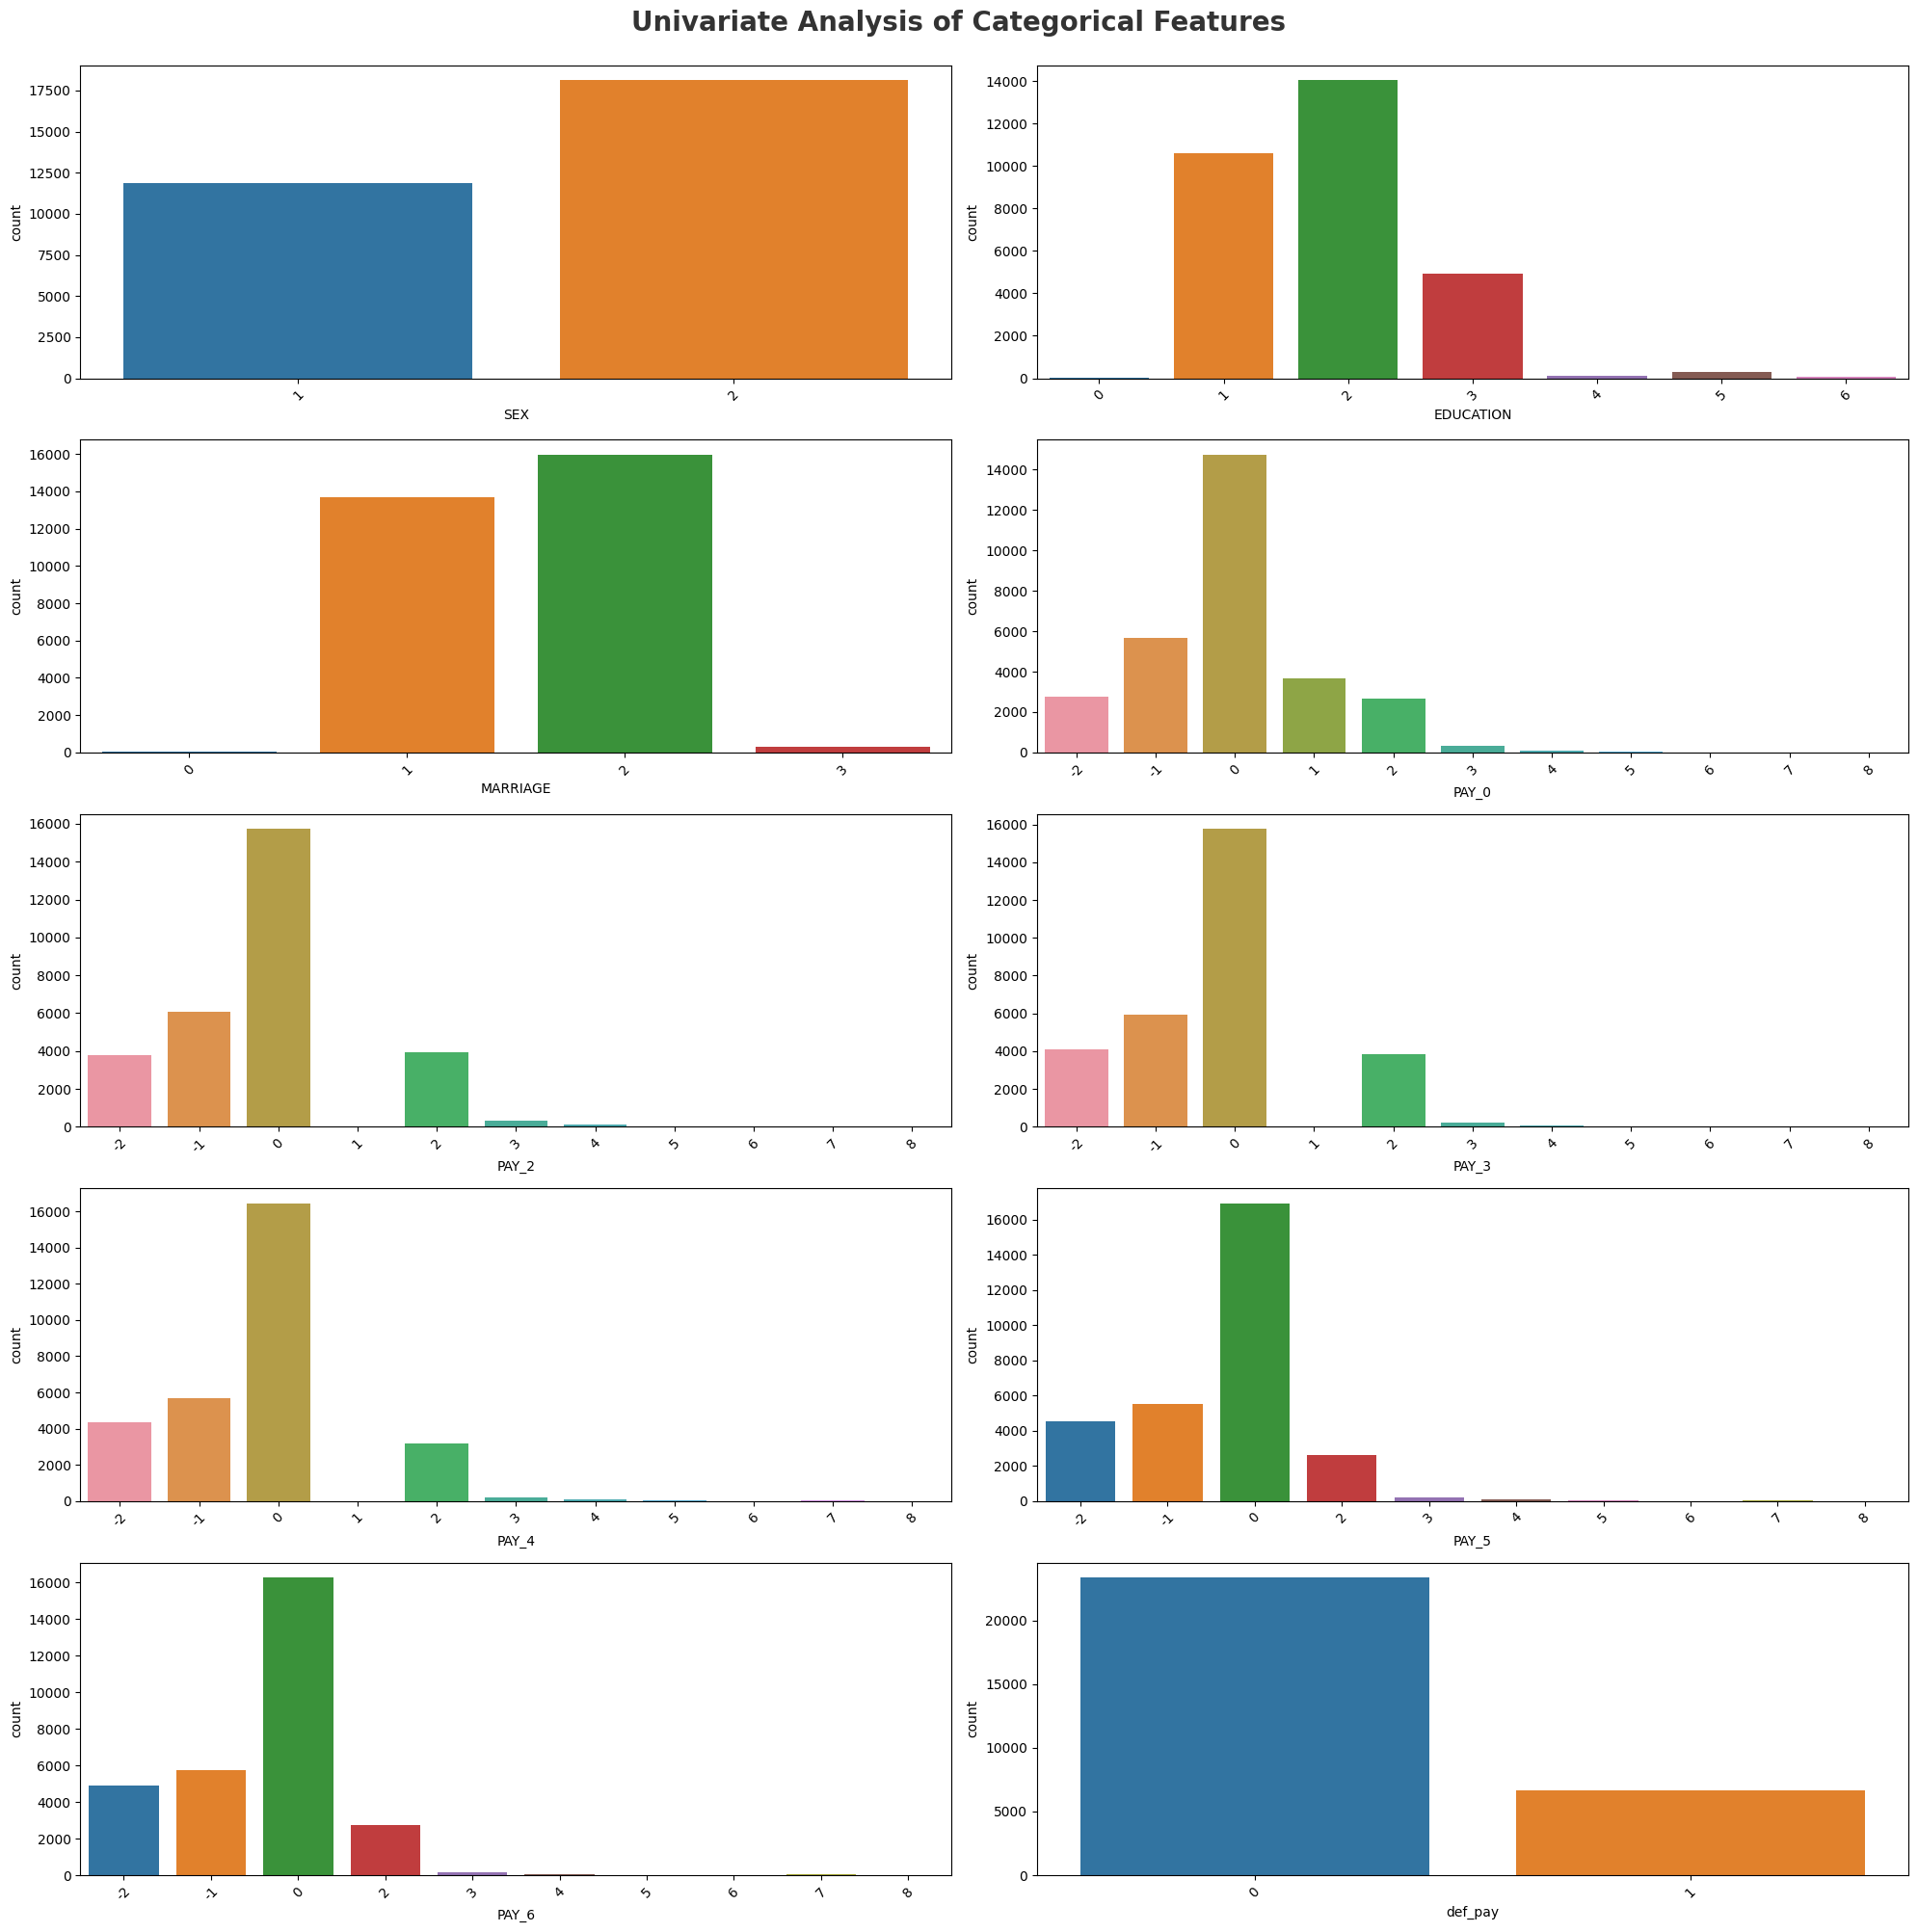

In [14]:
# categorical columns
plt.figure(figsize=(20, 20))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_list)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[cat_list[i]])
    plt.xlabel(cat_list[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

<br>1. From the analysis, the female customes transactions are higher than male</br>
*2*. The single customers are higher than married
<br>*3*. There is class imbalance in default payment</br>

#### Education

Since the 0, 4, 5, 6 of the education are unknown lets club it together.

<Axes: xlabel='EDUCATION', ylabel='count'>

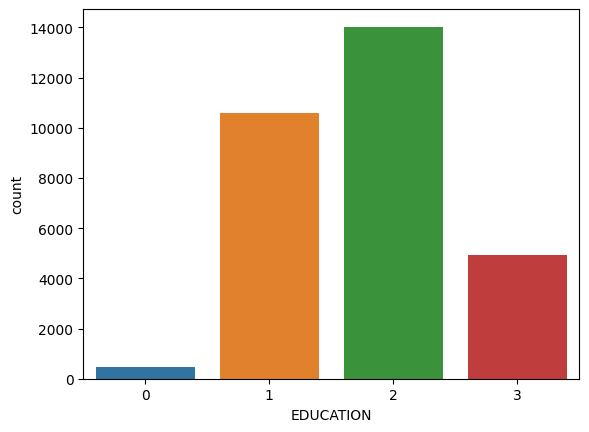

In [15]:
df.loc[df['EDUCATION'].isin([0, 4, 5, 6]), 'EDUCATION'] = 0
sns.countplot(x=df["EDUCATION"])

### category vs target variable

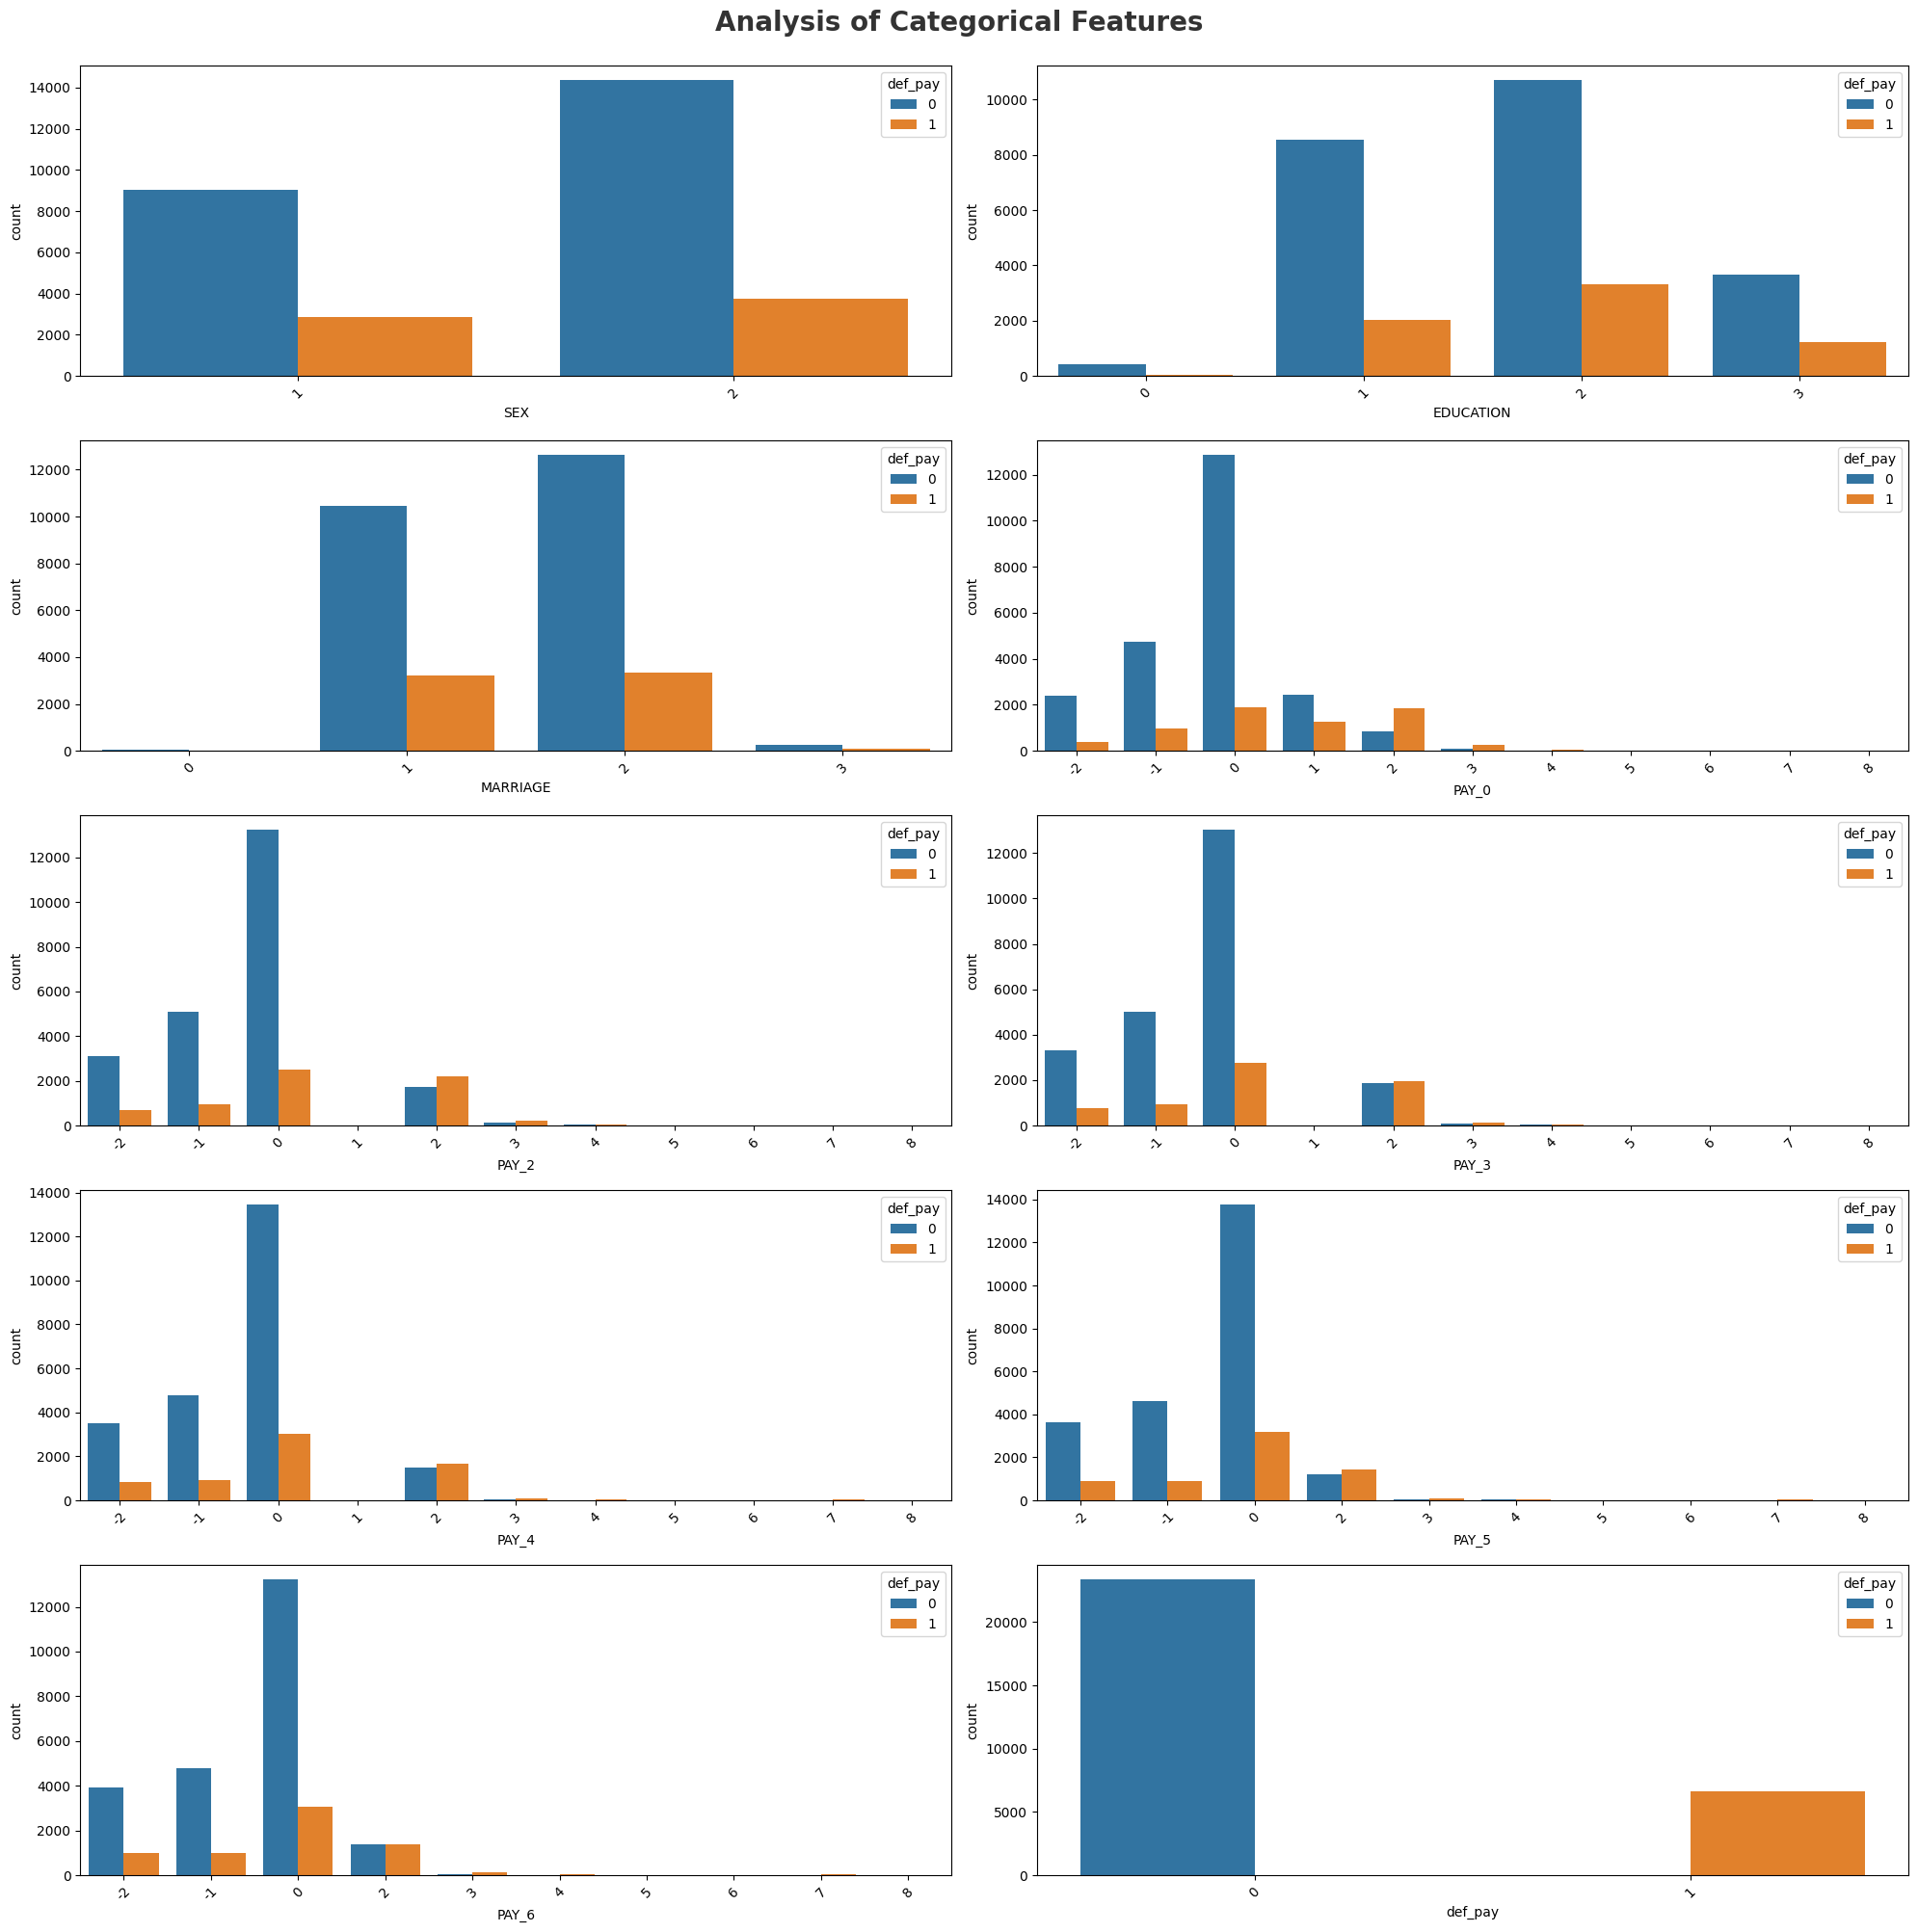

In [17]:
# categorical columns
target_variable = "def_pay"
plt.figure(figsize=(20, 20))
plt.suptitle('Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_list)):
    plt.subplot(5, 2, i+1)
    sns.countplot(data=df, x=df[cat_list[i]], hue=target_variable)
    plt.xlabel(cat_list[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

### Age

In [33]:
print("The youngest customer age is",df["AGE"].min())
print("The oldest customer age is ",df["AGE"].max())

The youngest customer age is 21
The oldest customer age is  79


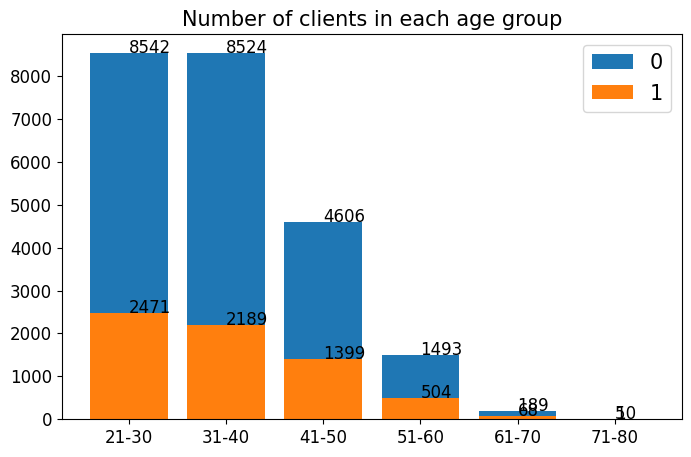

In [22]:
bins = [20, 30, 40, 50, 60, 70, 80]
names = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

df['AGE_BIN'] = pd.cut(x=df.AGE, bins=bins, labels=names, right=True)

age_cnt = df['AGE_BIN'].value_counts()
age_0 = df.loc[df['def_pay'] == 0, 'AGE_BIN'].value_counts()
age_1 = df.loc[df['def_pay'] == 1, 'AGE_BIN'].value_counts()

plt.figure(figsize=(8, 5))

plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x, y in zip(names, age_0):
    plt.text(x, y, y, fontsize=12)
for x, y in zip(names, age_1):
    plt.text(x, y, y, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

We can see that credit customers are higher in range 21 to 40 significantly. And they age, they pay the credit.

### Limit Balance

In [32]:
print("The minimum limit of the balance is",df["LIMIT_BAL"].min())
print("The maximum limit of the balance is",df["LIMIT_BAL"].max())

The minimum limit of the balance is 10000.0
The maximum limit of the balance is 1000000.0


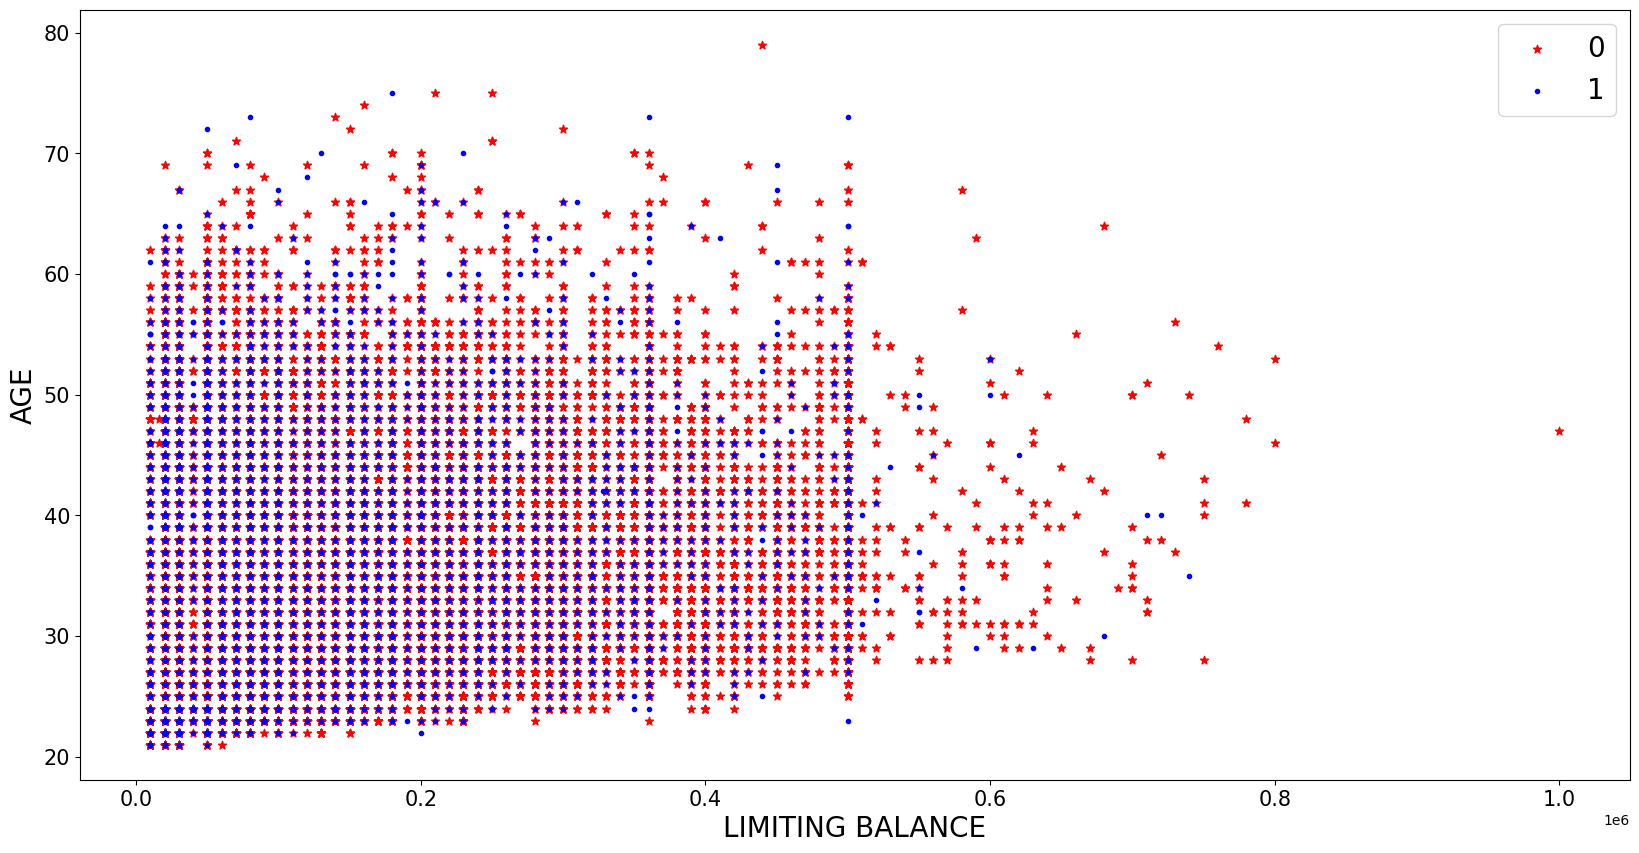

In [25]:
y1 = df.loc[df["def_pay"] == 0, "AGE"]
y2 = df.loc[df["def_pay"] == 1, "AGE"]
x1 = df.loc[df["def_pay"] == 0, "LIMIT_BAL"]
x2 = df.loc[df["def_pay"] == 1, "LIMIT_BAL"]

fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(x1, y1, color="r", marker="*", label='0')
plt.scatter(x2, y2, color="b", marker=".", label='1')
plt.xlabel("LIMITING BALANCE", fontsize=20)
plt.ylabel("AGE", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=20)
plt.show()


There is no consistent pattern in the graph with respect to age and limiting balance

### Feature engineering

In [34]:
df['total_bill_amt'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)


In [36]:
df['total_pay_amount'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)


In [37]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay,AGE_BIN,total_bill_amt,total_pay_amount
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,689.0,0.0,0.0,0.0,0.0,1,21-30,7704.0,689.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,21-30,17077.0,5000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,31-40,101653.0,11018.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,31-40,231334.0,8388.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,51-60,109339.0,59049.0
